In [1]:
import tensorflow as tf
import numpy as np

In [2]:
num_puntos = 2000

In [3]:
conjunto_puntos = []

In [4]:
for i in xrange(num_puntos):
    if np.random.random() < 0.25:
        conjunto_puntos.append([np.random.normal(0.0, 0.9), np.random.normal(0.0, 0.9)])
    elif np.random.random() > 0.75:
        conjunto_puntos.append([np.random.normal(3.0, 0.5), np.random.normal(3.0, 0.5)]) 
    else:
        conjunto_puntos.append([np.random.normal(5.0, 0.5), np.random.normal(5.0, 0.5)])         

In [5]:
for i in xrange(5):
    print conjunto_puntos[i]

[1.826693900431731, 0.5280416454766486]
[-0.5110423900005221, 0.1859707266618296]
[4.713145824463665, 5.1038890000310735]
[5.615980821843635, 4.385430891333909]
[-0.3695520498415297, -0.10784987815343229]


In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns

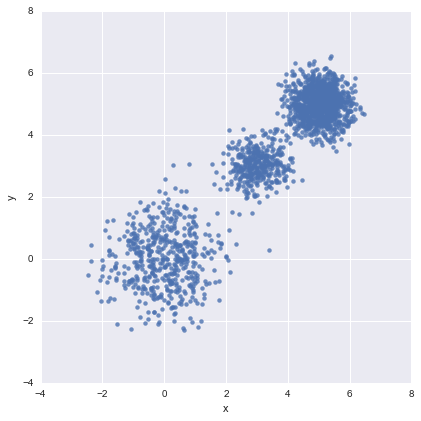

In [7]:
df = pd.DataFrame({"x": [v[0] for v in conjunto_puntos], "y": [v[1] for v in conjunto_puntos]})
sns.lmplot("x", "y", data=df, fit_reg=False, size=6)
plt.show()

In [8]:
import tensorflow as tf

In [9]:
init_op = tf.initialize_all_variables()
sess = tf.Session()
sess.run(init_op)

In [10]:
k = 3
vectors = tf.constant(conjunto_puntos)
shuffle_vectors = tf.slice(tf.random_shuffle(vectors), [0,0], [k,-1])
centroides = tf.Variable(tf.slice(tf.random_shuffle(vectors), [0,0], [k,-1]))
print vectors.get_shape()
print centroides.get_shape()

(2000, 2)
(3, 2)


In [11]:
expanded_vectors = tf.expand_dims(vectors, 0)
expanded_centroides = tf.expand_dims(centroides, 1)
print expanded_vectors.get_shape()
print expanded_centroides.get_shape()

(1, 2000, 2)
(3, 1, 2)


In [12]:
diff = tf.sub(expanded_vectors, expanded_centroides)
print diff.get_shape()
sqr = tf.square(diff)
distances = tf.reduce_sum(sqr, 2)
assignments = tf.argmin(distances, 0)
print distances.get_shape()
print assignments.get_shape()

(3, 2000, 2)
(3, 2000)
(2000,)


In [13]:
means = tf.concat(0, [tf.reduce_mean(tf.gather(vectors, tf.reshape(tf.where( tf.equal(assignments, c)),[1,-1])), reduction_indices=[1]) for c in xrange(k)])
update_centroides = tf.assign(centroides, means)

In [14]:
init_op = tf.initialize_all_variables()
sess = tf.Session()
sess.run(init_op)

for step in xrange(100):
    _, centroid_values, assignment_values = sess.run([update_centroides, centroides, assignments])

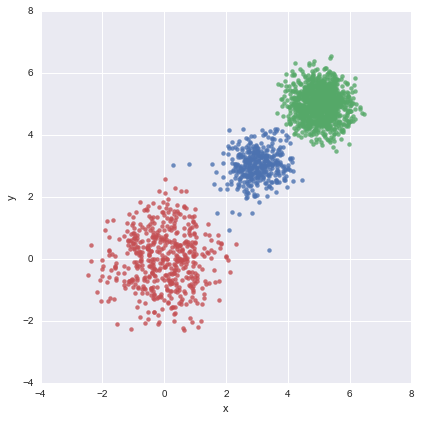

In [15]:
data = {"x": [], "y": [], "cluster": []}

for i in xrange(len(assignment_values)):
    data["x"].append(conjunto_puntos[i][0])
    data["y"].append(conjunto_puntos[i][1])
    data["cluster"].append(assignment_values[i])

df = pd.DataFrame(data)
sns.lmplot("x", "y", data=df, fit_reg=False, size=6, hue="cluster", legend=False)
plt.show()